In [11]:
import warnings
warnings.filterwarnings('ignore')

In [12]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import cv2

In [13]:
test_image = cv2.imread('Paint_image/logo_drew/tinder_1.png')
test_image = cv2.cvtColor(test_image, cv2.COLOR_RGB2GRAY)
test_image=255-test_image
#test_image = cv2.resize(test_image, (8, 8))

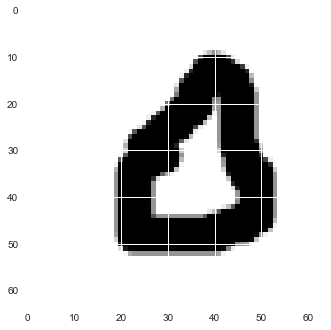

In [14]:
plt.imshow(test_image)

In [15]:
test_image 

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

Il faut créer une base de données 

On veut créer de la manière : ['data', 'target', 'target_names', 'images']

Liste ou numpy ? voire un dico ..

https://docs.python.org/3/library/glob.html


In [16]:
%%time
from glob import glob
import os

imPath = "Paint_image/logo_drew/"
ls_path = glob(os.path.join(imPath, '*' ))

ls_path


name_to_label ={'tinder':1,'messenger':2} #Pour labeliser facilement
data_base={'data': [], 'label' : [],'nom_label' :[],'image':[]}
for file in ls_path:                        #On parcours tous les fichiers                
    im = cv2.imread(file,0)                 #On charge l'image
    im=255-im                               #On inverse le contrast 
    im = cv2.resize(im, (8, 8))             #On met au bon format de pixels
    name= file.split('\\')[1].split('_')[0] #On extrait le type
    data_base['data']+=[np.ndarray.flatten(im)]
    data_base['label']+=[name_to_label[name]]
    data_base['nom_label']+=[name]
    data_base['image']+=[im]
data_base['data']=np.array(data_base['data'])
data_base['label']=np.array(data_base['label'])
data_base['nom_label']=np.array(data_base['nom_label'])
data_base['image']=np.array(data_base['image'])
    


Wall time: 99.9 ms


# We try some ML

In [30]:
from sklearn.ensemble import RandomForestClassifier
import random

In [46]:
from sklearn.cross_validation import train_test_split
np.random.seed(1)

logo_data=data_base['data']
logo_target=data_base['label']

Xtrain, Xtest, ytrain, ytest = train_test_split(logo_data, logo_target, test_size=0.3)
model = RandomForestClassifier(n_estimators=1000)
model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)

In [47]:
from sklearn import metrics
print(metrics.classification_report(ypred, ytest))

             precision    recall  f1-score   support

          1       0.94      0.94      0.94        16
          2       0.93      0.93      0.93        14

avg / total       0.93      0.93      0.93        30



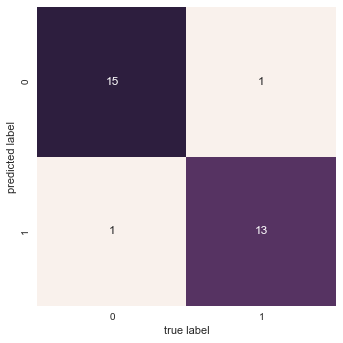

In [48]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, ypred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');